# Main code
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [20]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold


###############################################################################
# Data IO and generation

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

## interesting....cv object is iterable

In [21]:
print cv.indices
print cv.random_state
print cv.n_folds
print cv.shuffle
print cv.test_folds

True
None
6
False
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5]


/home/takanori/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:79: DeprecationWarning: The indices attribute is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


In [22]:
for i, (train_indices, test_indices) in enumerate(cv):
    print('Train: %s \n===== test: %s' % (train_indices, test_indices))

Train: [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
 93 94 95 96 97 98 99] 
===== test: [ 0  1  2  3  4  5  6  7  8 50 51 52 53 54 55 56 57 58]
Train: [ 0  1  2  3  4  5  6  7  8 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
 93 94 95 96 97 98 99] 
===== test: [ 9 10 11 12 13 14 15 16 17 59 60 61 62 63 64 65 66 67]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94 95 96 97 98 99] 
===== test: [18 19 20 21 22 23 24 25 68 69 70 71 72 73 74 75]
Train: [ 0  1  2  3

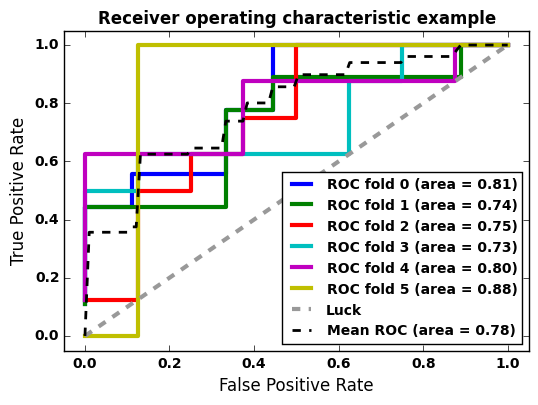

In [23]:
for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [24]:
cv

sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], n_folds=6, shuffle=False, random_state=None)

In [25]:
dir(cv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_empty_mask',
 '_indices',
 '_iter_test_indices',
 '_iter_test_masks',
 'indices',
 'n',
 'n_folds',
 'random_state',
 'shuffle',
 'test_folds',
 'y']

# Help - StratifiedKFold

In [26]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.cross_validation:

class StratifiedKFold(_BaseKFold)
 |  Stratified K-Folds cross validation iterator
 |  
 |  Provides train/test indices to split data in train test sets.
 |  
 |  This cross-validation object is a variation of KFold that
 |  returns stratified folds. The folds are made by preserving
 |  the percentage of samples for each class.
 |  
 |  Parameters
 |  ----------
 |  y : array-like, [n_samples]
 |      Samples to split in K folds.
 |  
 |  n_folds : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each stratification of the data before splitting
 |      into batches.
 |  
 |  random_state : None, int or RandomState
 |      Pseudo-random number generator state used for random
 |      sampling. If None, use default numpy RNG for shuffling
 |  
 |  Examples
 |  --------
 |  >>> from sklearn import cross_validation
 |  >>> X = np.array([[1, 2], [3, 4]

In [27]:
print cv.__class__
cv

<class 'sklearn.cross_validation.StratifiedKFold'>


sklearn.cross_validation.StratifiedKFold(labels=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], n_folds=6, shuffle=False, random_state=None)

In [28]:
dir(cv)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_empty_mask',
 '_indices',
 '_iter_test_indices',
 '_iter_test_masks',
 'indices',
 'n',
 'n_folds',
 'random_state',
 'shuffle',
 'test_folds',
 'y']

In [29]:
cv.n

100

In [30]:
cv.n_folds

6

In [31]:
cv.shuffle

False

In [32]:
cv.test_folds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5])

In [33]:
cv.test_folds.shape

(100,)

In [34]:
interp?